In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
palms=pd.read_csv('../data_files/palms_alltraits_curated_20210210.csv',sep='\t')
palms.groupby(by='shape').count()['species']

shape
bipinnate       14
cospalmate     440
entire         108
pinnate       1872
variable        78
Name: species, dtype: int64

In [4]:
canopy_num={'canopy':1,np.nan:np.nan,'understorey':0}
palms['UnderstoreyCanopy_num']=palms['UnderstoreyCanopy'].map(canopy_num)
palms['UnderstoreyCanopy_num'].unique()

array([ 1., nan,  0.])

In [6]:
all_variables=palms[['bio1','bio2','bio3','bio4','bio5','bio6','bio7','bio8','bio9','bio10','bio11','bio12','bio13','bio14','bio15','bio16','bio17','bio18','bio19','aridity',
              'nutrient_avail','nutrient_retention','rooting_conditions','oxygen_avail_toroots','excess_salts','toxicity','workability',
               'MaxStemHeight_m','MaxStemDia_cm','MaxLeafNumber','Max_Blade_Length_m','Max_Rachis_Length_m','Max_Petiole_length_m','StemHeightBladeLength','UnderstoreyCanopy_num']]
np.random.seed(666)
all_rho, all_pval=stats.spearmanr(all_variables,axis=0,nan_policy='omit')
print(all_pval)

[[0.00000000e+00 9.68383281e-24 6.67746785e-47 ... 2.06186590e-02
  2.14354547e-04 6.74301301e-01]
 [9.68383281e-24 0.00000000e+00 3.70936585e-14 ... 8.09876542e-05
  8.17883253e-01 8.56249995e-01]
 [6.67746785e-47 3.70936585e-14 0.00000000e+00 ... 1.12691503e-01
  2.08553671e-02 1.21674298e-05]
 ...
 [2.06186590e-02 8.09876542e-05 1.12691503e-01 ... 0.00000000e+00
  2.05781070e-87 7.27328755e-04]
 [2.14354547e-04 8.17883253e-01 2.08553671e-02 ... 2.05781070e-87
  0.00000000e+00 0.00000000e+00]
 [6.74301301e-01 8.56249995e-01 1.21674298e-05 ... 7.27328755e-04
  0.00000000e+00 0.00000000e+00]]


In [10]:
allvariable_dict={'bio1':'Temperature\n(Celcius*100)','bio2':'Mean Diurnal Range','bio3':'Isothermality (BIO2/BIO7)','bio4':'Log10 Temperature seasonality\n(Standard Deviation*100)',
                  'bio5':'Max Temperature of Warmest Month','bio6':'Min Temperature of Coldest Month','bio7':'Temperature Annual Range','bio8':'Mean Temperature of Wettest Quarter',
                  'bio9':'Mean Temperature of Driest Quarter','bio10':'Mean Temperature of Warmest Quarter','bio11':'Mean Temperature of Coldest Quarter','bio12':'Log10 Precipitation (mm)',
                  'bio13':'Precipitation of Wettest Month','bio14':'Precipitation of Driest Month','bio15':'Log10 Precipitation seasonality\n(Coefficient of Variation mm)','bio16':'Precipitation of Wettest Quarter',
                  'bio17':'Precipitation of Driest Quarter','bio18':'Precipitation of Warmest Quarter','bio19':'Precipitation of Coldest Quarter','aridity':'Log10 Aridity (Prec/(Temp+10))','nutrient_avail':'Nutrient availability',
                  'nutrient_retention':'Nutrient retention','rooting_conditions':'Rooting conditions','oxygen_avail_toroots':'Oxygen availability to roots','excess_salts':'Excess salts in soil',
                  'toxicity':'Soil toxicity','workability':'Soil workability','MaxStemHeight_m': 'Max Stem Height (m)','MaxStemDia_cm':'Max Stem Diameter (m)',
                  'MaxLeafNumber':'Log10 Max leaf number','Max_Blade_Length_m':'Max blade length (m)','Max_Rachis_Length_m':'Log10 Max rachis length (m)','Max_Petiole_length_m':'Max petiole length (m)',
                  'StemHeightBladeLength': 'Log10 Palm size (m)','UnderstoreyCanopy_num':'Understory/Canopy'}

allvariable_coldict={'bio1':'k','bio2':'#bababa','bio3':'#bababa','bio4':'k','bio5':'#bababa',
                  'bio6':'#bababa','bio7':'#bababa','bio8':'#bababa','bio9':'#bababa','bio10':'#bababa','bio11':'#bababa','bio12':'k',
                  'bio13':'#bababa','bio14':'#bababa','bio15':'k','bio16':'#bababa','bio17':'#bababa','bio18':'#bababa','bio19':'#bababa','nutrient_avail':'k','aridity':'k',
                  'nutrient_retention':'#bababa', 'rooting_conditions':'k', 'oxygen_avail_toroots':'#bababa', 'excess_salts':'#bababa', 'toxicity':'#bababa',
                  'workability':'k','MaxStemHeight_m': '#bababa','MaxStemDia_cm':'#bababa','MaxLeafNumber':'k','Max_Blade_Length_m':'#bababa','Max_Rachis_Length_m':'k',
                  'Max_Petiole_length_m':'#bababa','StemHeightBladeLength': 'k','UnderstoreyCanopy_num':'#bababa'}

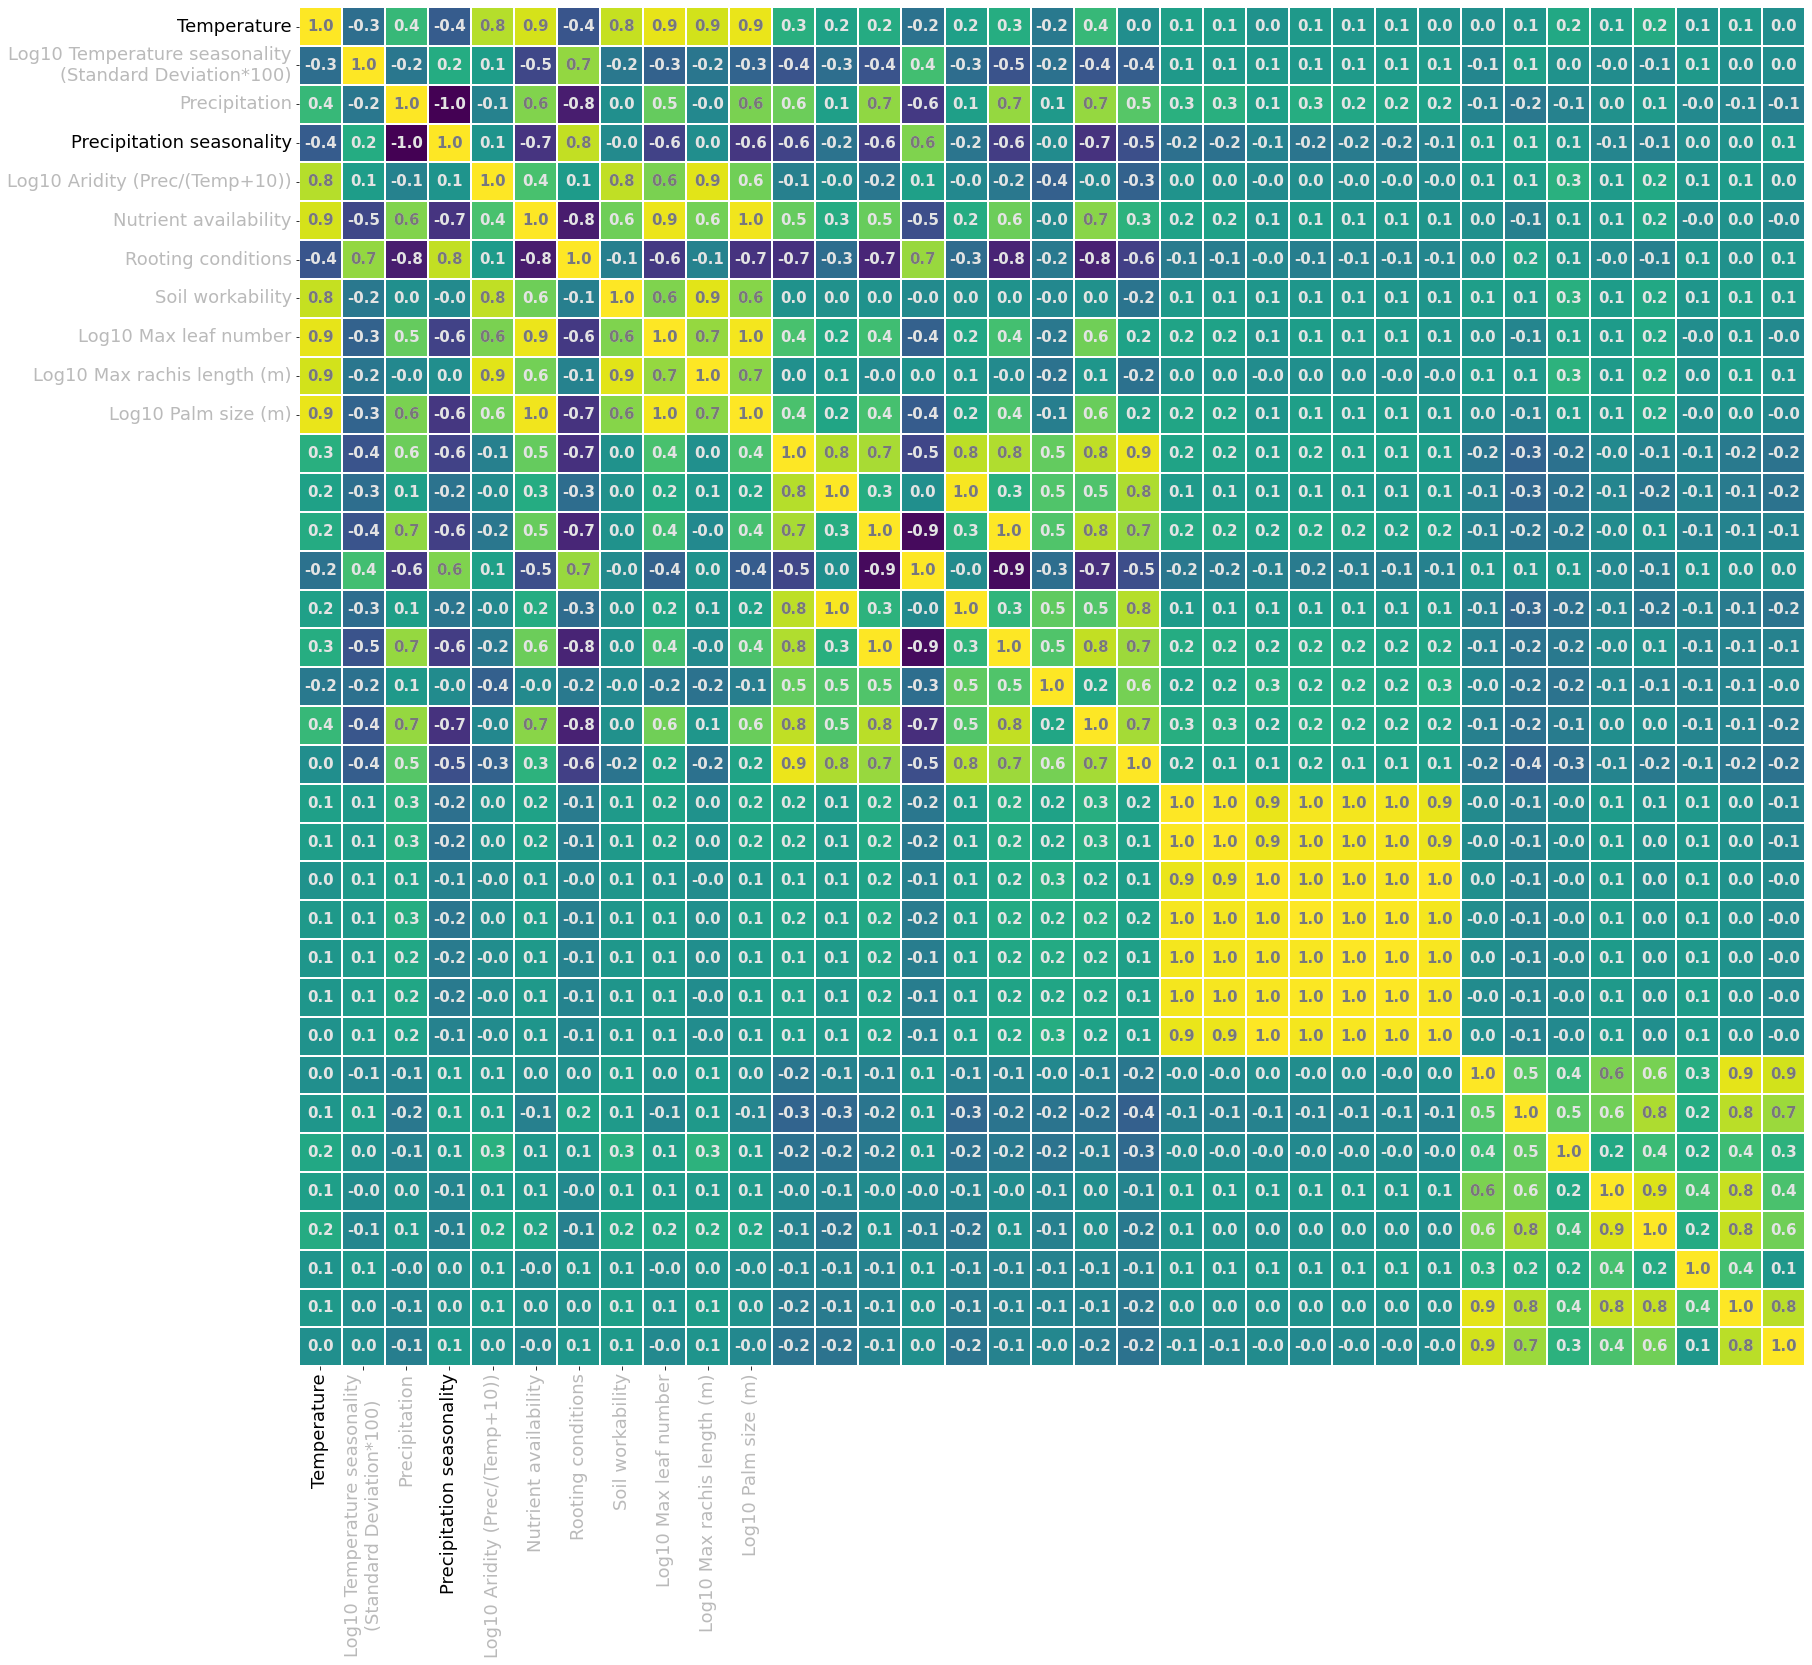

In [14]:
Fig,ax=plt.subplots(figsize=(27,25),facecolor='w')
hm=sns.heatmap(all_rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,fmt='.1f',annot_kws={'fontsize':15,'color':'#e3e3e3','fontweight':'bold'})
sns.heatmap(all_rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,mask=all_rho<0.6,fmt='.1f',annot_kws={'fontsize':15,'color':'#787878','fontweight':'bold'})
hm.set_xticklabels(hm.get_xticklabels(), rotation=90,fontdict={'fontsize':18,'verticalalignment':'top'}) #horizontalalignment
hm.set_yticklabels(hm.get_yticklabels(), rotation=0,fontdict={'fontsize':18,'verticalalignment':'center'}) #[ 'center' | 'top' | 'bottom' | 'baseline' ]

for tick,color in zip(ax.get_xticklabels(),allvariable_coldict.values()):
    tick.set_color(color)
for tick,color in zip(ax.get_yticklabels(),allvariable_coldict.values()):
    tick.set_color(color)

plt.savefig('../data_files/Cor_allvariables.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [12]:
variables=palms[['bio1','bio4','bio12','bio15','aridity','nutrient_avail','rooting_conditions','workability','MaxLeafNumber','Max_Rachis_Length_m','StemHeightBladeLength']]
variables 

,bio1,bio4,bio12,bio15,aridity,nutrient_avail,rooting_conditions,workability,MaxLeafNumber,Max_Rachis_Length_m,StemHeightBladeLength
0,255.0,3.214579,3.231470,1.740363,0.873955,0.0,0.0,0.0,1.414973,0.230449,1.103804
1,252.0,3.183270,3.163161,1.845098,0.831713,0.0,0.0,0.0,1.491362,0.544068,1.301030
2,247.0,3.287578,3.155943,1.770852,0.806180,0.0,0.0,0.0,1.204120,NaN,1.397940
3,203.0,3.344981,3.117603,1.863323,0.847422,0.0,0.0,0.0,NaN,NaN,0.000000
4,240.0,3.205475,3.193959,1.869232,0.853698,0.0,0.0,0.0,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.612784,NaN,1.491362
2620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [16]:
np.random.seed(666)
rho, pval=stats.spearmanr(variables,axis=0,nan_policy='omit')
print(pval)

[[0.00000000e+000 4.36571740e-058 5.20434584e-028 1.19103371e-017
  9.50120984e-001 1.55925421e-008 1.32490243e-001 1.06778976e-001
  1.85161493e-013 3.13094687e-015 2.14354547e-004]
 [4.36571740e-058 0.00000000e+000 1.47556241e-128 1.07432238e-161
  2.44242435e-089 8.10064589e-021 6.96054660e-004 1.84929813e-004
  4.49956370e-003 3.30088556e-004 9.15388694e-002]
 [5.20434584e-028 1.47556241e-128 0.00000000e+000 4.11687037e-118
  0.00000000e+000 9.45870642e-013 1.44888755e-006 1.48125051e-006
  8.61302157e-014 2.84337156e-003 9.58810251e-010]
 [1.19103371e-017 1.07432238e-161 4.11687037e-118 0.00000000e+000
  6.72350504e-094 1.36244640e-012 5.22724392e-005 4.16616404e-005
  4.48544218e-003 6.18759799e-005 5.82330563e-002]
 [9.50120984e-001 2.44242435e-089 0.00000000e+000 6.72350504e-094
  0.00000000e+000 2.65281051e-009 1.25050763e-006 1.48320621e-006
  9.00695288e-022 5.26477011e-008 3.32947489e-012]
 [1.55925421e-008 8.10064589e-021 9.45870642e-013 1.36244640e-012
  2.65281051e-009 0

In [19]:
allvariable_dict={'bio1':'Temperature','bio4':'Log10 Temperature seasonality\n(Standard Deviation*100)','bio12':'Log10 Precipitation','bio15':'Log10 Precipitation seasonality','aridity':'Log10 Aridity (Prec/(Temp+10))','nutrient_avail':'Nutrient availability',
                 'rooting_conditions':'Rooting conditions','workability':'Soil workability','MaxLeafNumber':'Log10 Max leaf number','Max_Rachis_Length_m':'Log10 Max rachis length (m)',
                  'StemHeightBladeLength': 'Log10 Palm size (m)'}#,'UnderstoreyCanopy_num':'Understory/Canopy'}

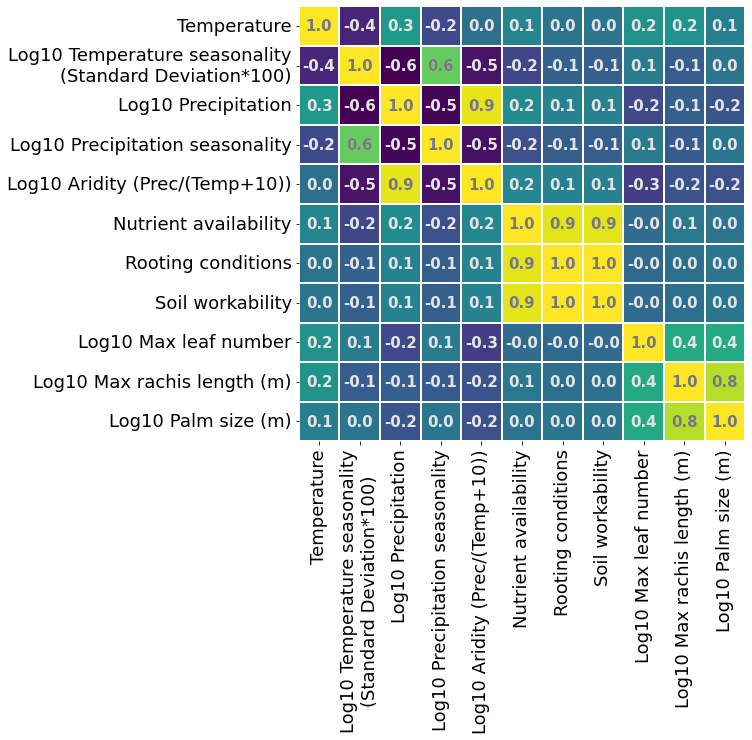

In [20]:
Fig,ax=plt.subplots(figsize=(8,8),facecolor='w')
hm=sns.heatmap(rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,fmt='.1f',annot_kws={'fontsize':15,'color':'#e3e3e3','fontweight':'bold'})
sns.heatmap(rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,mask=rho<0.6,fmt='.1f',annot_kws={'fontsize':15,'color':'#787878','fontweight':'bold'})
hm.set_xticklabels(hm.get_xticklabels(), rotation=90,fontdict={'fontsize':18,'verticalalignment':'top'}) #horizontalalignment
hm.set_yticklabels(hm.get_yticklabels(), rotation=0,fontdict={'fontsize':18,'verticalalignment':'center'}) #[ 'center' | 'top' | 'bottom' | 'baseline' ]
plt.savefig('../data_files/Cor_selectedvariables.pdf',dpi=300,bbox_inches='tight')
plt.show()